# <h1><center>Travaux Pratiques - Chaînes de Markov - HMMs</center></h1>

# Première partie

## I.1 Fonctions dont vous pouvez avoir besoin

In [1]:
# imports
import numpy as np
from numpy import cumsum, loadtxt, argmax, concatenate, ones, array, set_printoptions, stack, log, zeros, amax, exp
from numpy.random import random
from matplotlib.pyplot import plot, figure, title, xlabel, ylabel, xlim, ylim, grid, show, imshow, subplot, suptitle

# path to data files
path = '/home/tp_ML'

# matrix display precision
set_printoptions(suppress=True, precision=3)

### I.2 Chaîne de Markov

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par
une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet
auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui
sert à terminer les mots.
La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1
correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de
dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de
l’alphabet.

In [2]:
# creation of dictionary
dic = {'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }

# creation of inverse dictionary
dic_inv = {v: k for k, v in dic.items()}

### I.2.a Matrice de transitions

* 'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux
symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition
correspond à la probabilité de transiter vers l’état j à partir de l’état i.

In [3]:
# load transition matrix for English bigrams
bi_eng = loadtxt(path + '/bigramenglish.txt')

* A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la
dernière colonne ?

In [4]:
print("La première ligne de la matrice de transition est: ")
print()
print(bi_eng[0,:])

La première ligne de la matrice de transition est: 

[0.    0.113 0.044 0.045 0.033 0.022 0.042 0.016 0.064 0.069 0.004 0.004
 0.023 0.04  0.023 0.07  0.031 0.001 0.026 0.067 0.165 0.01  0.007 0.071
 0.    0.011 0.    0.   ]


La première ligne correspond à la probabilité de passer de l'état 1 (l'espace initial) à n'importe quel état du modèle. On oberve par exemple que la probabilitié de passer de l'état initial à lui-même (A(1,1)), ou à l'état final (A(1,28)) est égale à zéro. Cela qui implique que le modèle force à transiter par des lettres depuis l'état initial pour former des mots, ce qui est le but de l'exercice.

In [5]:
print("La dernière colonne de la matrice de transition est: ")
print()
print(bi_eng[:,-1])

La dernière colonne de la matrice de transition est: 

[0.    0.067 0.007 0.02  0.599 0.36  0.397 0.316 0.103 0.025 0.001 0.372
 0.153 0.158 0.294 0.123 0.064 0.001 0.211 0.43  0.223 0.038 0.    0.102
 0.123 0.776 0.002 1.   ]


La dernière colonne de la matrice correspond à la probabilité de passer de n'importe quel état du modèle à l'état final. On oberve là encore une probabilité nulle pour les états initiaux et finaux ((A(1,28) et A(28,28)), impliquant l'obligation de transiter par des lettres avant d'atteindre l'état final ou d'y retourner.

* Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [6]:
print("les transitions les plus fréquentes depuis chaque lettre sont:")
[key1 + ' -> ' + dic[str(key2+1)] for key1, key2 in zip(dic_inv, argmax(bi_eng, axis=1))]

les transitions les plus fréquentes depuis chaque lettre sont:


['  -> t',
 'a -> n',
 'b -> e',
 'c -> o',
 'd ->  ',
 'e ->  ',
 'f ->  ',
 'g ->  ',
 'h -> e',
 'i -> n',
 'j -> o',
 'k ->  ',
 'l -> e',
 'm -> e',
 'n ->  ',
 'o -> n',
 'p -> e',
 'q -> u',
 'r -> e',
 's ->  ',
 't -> h',
 'u -> r',
 'v -> e',
 'w -> a',
 'x -> t',
 'y ->  ',
 'z -> e']

### I.2.b Générer un mot

* On veut générer un mot à partir de l’état initial 1 (espace de début de mot).

* Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à
l’aide de la matrice de transitions et de la fonction de répartition.

In [7]:
def etat_suivant(etat_courant, matrice_transition):
    transition_cumulee = cumsum(matrice_transition[etat_courant-1,:])
    return sum(transition_cumulee<random())+1

* Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition
et expliquer son rôle pour la génération de l’état à t+1.

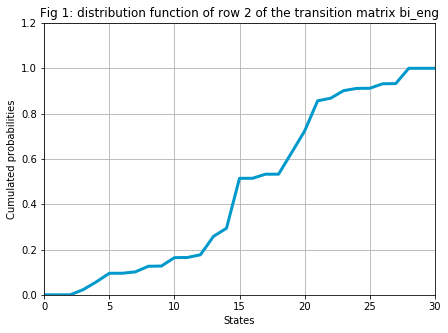

In [8]:
# choose row to display
row = 2
# plot the cdf
cdf = [0] + list(cumsum(bi_eng[row-1,:])) + [1, 1]
fig_1 = figure(figsize=(7,5))
plot([i for i in range(0 ,31)], cdf, linewidth=3, c=(0, 0.6, 0.8));
title('Fig 1: distribution function of row ' + str(row) + ' of the transition matrix bi_eng')
xlabel('States')
ylabel('Cumulated probabilities')
xlim([0,30])
ylim([0,1.2])
grid(True)
show()

La fonction de répartition permet de générer l'état t+1 à partir de l'état t, en utilisant un nombre aléatoire uniforme. C'est la méthode d'inversion de la fonction de répartition: on pioche uniformément un nombre entre 0 et 1, puis inverse la fonction de répartition pour trouver à quelle valeur de x (ici x=état) correspond cette probabilité cumulée.

* Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence
d’états jusqu’à aboutir à l’état final (28).

In [9]:
def genere_state_seq(matrice_transition):
    state_seq = [1]
    terminal_state = matrice_transition.shape[0]
    while state_seq[-1] != terminal_state:
        state_seq.append(etat_suivant(state_seq[-1], matrice_transition))
    return state_seq

* Ecrire une fonction display_seq qui transforme une
séquence d’états en séquence de caractères, à l’aide d’un dictionnaire. 

In [10]:
def display_seq(state_sequence, dictionary):
    return ''.join([dictionary[str(state)] for state in state_sequence]).lstrip()

* Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [11]:
# number of words to display
words = 20

# display words
print(str(words) + " words generated by the function:")
print("")
for word in range(words):
    print(display_seq(genere_state_seq(bi_eng), dic))

20 words generated by the function:

my 
panene 
selil 
tistto 
ne 
ton 
phafinth 
dlonatho 
g 
t 
h 
han 
iolig 
be 
velel 
iligrin 
frn 
uphef 
avid 
e 


### I.2.c Générer une phrase

* On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29,
correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état
final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition
et le dictionnaire en conséquence.

Note: je crée deux fonctions séparées au lieu d'une, pour des raisons de clarté d'une part, et de practicité d'autre part avec la partie reconnaissance de langue, pour lequel ce choix s'avère plus flexible.

In [12]:
def modifie_mat(transition_matrix):
    matrix_dimension = transition_matrix.shape[0]
    new_transition_matrix = transition_matrix.copy()
    new_transition_matrix[-1,0] = 0.9
    new_transition_matrix[-1,-1] = 0
    right_block = array([[0] * (matrix_dimension-1) + [0.1]])
    low_block = array([[0] * (matrix_dimension) + [1]])
    new_transition_matrix = concatenate((concatenate((new_transition_matrix, right_block.T), axis=1), low_block), axis=0)
    return new_transition_matrix

def modifie_dic(dictionary, modif_list):
    new_dictionary = dictionary.copy()
    for tuple in modif_list:
        new_dictionary[tuple[0]] = tuple[1]
    return new_dictionary

* Donner des exemples de phrases générées.

In [13]:
# number of sentences to display
sentences = 10

# update transition matrix and dictionary
new_bi_eng = modifie_mat(bi_eng)
new_dic = modifie_dic(dic, [('28', ''), ('29', '.')])

# display sentence
print(str(sentences) + " sentences generated by the function:")
print("")
for sentence in range(sentences):
    print(display_seq(genere_state_seq(new_bi_eng), new_dic))

10 sentences generated by the function:

fe baibrend whe pesode s y ing ise th by d de incor herncaman n ofumo br s gre.
alat tornge.
tot hir wofoud bid tedere arvio d ng e t.
th they citen.
lllise or ally.
use gatheestthe t.
d cond.
awer bourblledisedicet heave.
weanallauges herof atiliolora wothre pr hand phimim ban le.
nlt sutlle.


### I.3. Reconnaissance de la langue

* Charger la matrice des transitions entre caractères pour le français.

In [14]:
# load transition matrix for French bigrams
bi_fr = loadtxt(path + '/bigramfrancais.txt')

# update to account for sentences (base matrix is only for words)
new_bi_fr = modifie_mat(bi_fr)

* Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée
en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions
(notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra
transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , +
et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase,
respectivement.


In [15]:
# update of dictionary to account for symbols instead of spaces
dic_sym = modifie_dic(dic, [('1', '-'), ('28', '+'), ('29', '.')])

# creation of inverse dictionary
dic_sym_inv = {v: k for k, v in dic_sym.items()}

# creation of likelihood calculation function
def calc_vraisemblance(sentence, transition_matrix, inverse_dictionary):
    # replace spaces with symbols
    sentence = '-' + sentence.replace(" ", "+-").replace(".", "+.")
    # initiate likelihood value
    likelihood = 1
    # sequentially consider pairs of current character, next character in the sentence
    for tuple in zip(sentence[0:-1], sentence[1:]):
        # use inverse dictionary to obtain states from characters
        current_state, next_state = int(dic_sym_inv[tuple[0]]), int(dic_sym_inv[tuple[1]])
        # update likelihood with transition probability
        likelihood *= transition_matrix[current_state-1, next_state-1]
    return likelihood

* Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ».
De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne
pas etre ».

In [16]:
# calculate likelihoods
lik_fr_to_be = calc_vraisemblance('to be or not to be.', new_bi_fr, dic_sym_inv)
lik_eng_to_be = calc_vraisemblance('to be or not to be.', new_bi_eng, dic_sym_inv)
lik_fr_etre = calc_vraisemblance('etre ou ne pas etre.', new_bi_fr, dic_sym_inv)
lik_eng_etre = calc_vraisemblance('etre ou ne pas etre.', new_bi_eng, dic_sym_inv)

# display results
print("La vraisemblance de 'to be or not to be' est de " + str(lik_fr_to_be) + " pour la langue française.")
print("La vraisemblance de 'to be or not to be' est de " + str(lik_eng_to_be) + " pour la langue anglaise.")
print("La vraisemblance de 'etre ou ne pas etre' est de " + str(lik_fr_etre) + " pour la langue française.")
print("La vraisemblance de 'etre ou ne pas etre' est de " + str(lik_eng_etre) + " pour la langue anglaise.")

La vraisemblance de 'to be or not to be' est de 5.9602081018686406e-30 pour la langue française.
La vraisemblance de 'to be or not to be' est de 8.112892227809415e-20 pour la langue anglaise.
La vraisemblance de 'etre ou ne pas etre' est de 1.145706887234789e-19 pour la langue française.
La vraisemblance de 'etre ou ne pas etre' est de 4.462288711775253e-24 pour la langue anglaise.


On note que la reconnaissance de langue fonctionne bien. Le modèle attribue une vraisemblance plus élevée à la langue anglaise pour la phrase "to be or not to be", et une vraisemblance plus élevée à la langue française pour la phrase "être ou ne pas être".

# Deuxième partie

### II. 1. Introduction

* L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de
Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations
suivant un modèle de Markov Caché donné.
* Le modèle de Markov est de type discret. 
* Les classes de caractères (classes 0, 1, 7) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite. La matrice de transitions A de taille QxQ.
* Les vecteurs π sont tous égaux à π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q1=1.
* Un symbole correspond à une colonne de 5 pixels (binaires : noir/blanc). Il y a 2^5=32 configurations, et donc N=32 symboles possibles. Les symboles sont stocké dans la matrice V, de taille QxN.
* Les probabilités des observations dans chaque état sont indiquées dans la matrice B de taille NxQ.



### II. 2. Génération de séquences d’observations

* Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π
correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt
contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.

In [17]:
# load all files
A0 = loadtxt(path + '/A0.txt')
B0 = loadtxt(path + '/B0.txt')
Pi = loadtxt(path + '/vect_pi0.txt')
V = loadtxt(path + '/matrice_symboles.txt')

### II. 2.1 Matrices creuses

* A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π ?

In [18]:
print("La matrice B est donnée par:")
print()
print(B0)

La matrice B est donnée par:

[[ 1.    -0.    -0.    -0.     1.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.     0.018 -0.   ]
 [-0.     0.078  0.     0.129 -0.   ]
 [-0.     0.012  0.017  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.003  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.024  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.018  0.     0.163 -0.   ]
 [-0.     0.     0.317  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.215  0.     0.049 -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.     0.019 -0.   ]
 [-0.     0.     0.454  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.     0.002 -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.566  0.     0.502 -0.   ]
 [-0.     0.022  0.007  0.    -0.   ]
 [-0.     0.     0.     0.    -0.   ]
 [-0.     0.006  0. 

Les zéros correspondent ux symboles qui ne peuvent pas être atteints pour un état caché donné. Par exemple, le fait que B(2,1)=0 implique que lorsqu'on se trouve dans l'état 1, on ne peut pas observer le symbole 2. En observant la matrice, on remarque qu'elle est creuse: seules quelques entrées sont non-zéro, ce qui implique que seuls un petit nombre de symboles peuvent être observés dans chaque état. Certains symboles ne sont même atteints dans aucun état (par exemple le symbole 2).

In [19]:
print("La matrice A est donnée par:")
print()
print(A0)

La matrice A est donnée par:

[[ 0.842  0.158 -0.    -0.    -0.   ]
 [-0.     0.789  0.211 -0.    -0.   ]
 [-0.    -0.     0.863  0.137 -0.   ]
 [-0.    -0.    -0.     0.792  0.208]
 [-0.    -0.    -0.    -0.     1.   ]]


Les zéros correspondent aux états cachés qui ne peuvent pas être atteints pour un état caché donné. Par exemple, le fait que A(2,1)=0 implique que lorsqu'on se trouve dans l'état 2, on ne peut pas retourner à l'état 1. On reconnaît dans la matrice 1 une matrice gauche-droite, qui implique qu'une fois un état atteint on ne peut retourner à aucun état précédent et qu'on peut seulement atteindre le ou les états suivants.

In [20]:
print("Le vecteur pi est donné par:")
print()
print(Pi)

Le vecteur pi est donné par:

[1. 0. 0. 0. 0.]


Les zéros correspondent aux états qui ne peuvent pas constituer des états initiaux. Ici, pi(2) = 0 implique qu'on ne peut pas démarrer le processus à l'état caché 2. En réalité, on remarque que le seul état initial possible avec ce vecteur pi est l'état caché 1.

### II.2.2 Fonction de transitions

* Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.

In [21]:
def etat_suivant(etat_courant, matrice_transition):
    transition_cumulee = cumsum(matrice_transition[etat_courant-1,:])
    return sum(transition_cumulee<random())+1

* Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son
rôle pour la génération de l’état à t+1.

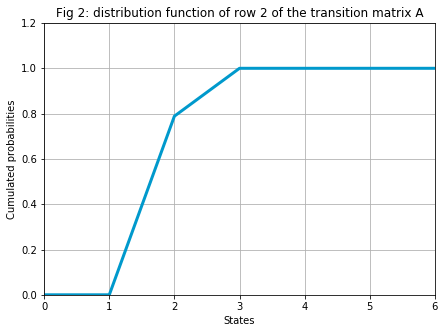

In [22]:
# choose row to display
row = 2
# plot the cdf
cdf = [0] + list(cumsum(A0[row-1,:])) + [1]
fig_2 = figure(figsize=(7,5))
plot([i for i in range(0 ,7)], cdf, linewidth=3, c=(0, 0.6, 0.8));
title('Fig 2: distribution function of row ' + str(row) + ' of the transition matrix A')
xlabel('States')
ylabel('Cumulated probabilities')
xlim([0,6])
ylim([0,1.2])
grid(True)
show()

La fonction de répartition permet de générer l'état t+1 à partir de l'état t, en utilisant un nombre aléatoire uniforme. C'est la méthode d'inversion de la fonction de répartition: on pioche uniformément un nombre entre 0 et 1, puis inverse la fonction de répartition pour trouver à quelle valeur de x (ici x=état) correspond cette probabilité cumulée.

### II.2.3 Générer une séquence d'observations

* Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.
On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction
etat_suivant. Puis on générera la séquence d’observations par le même procédé.

In [23]:
# function to generate both state and observation sequence
def genere_state_obs_seq(matrice_transition, matrice_observations):
    # initiate state and observations sequences; initial state is always 1
    state_seq = [1]
    obs_seq = [etat_suivant(1, matrice_observations.T)]
    # generate sequences
    terminal_state = matrice_transition.shape[0]
    while state_seq[-1] != terminal_state:
        state_seq.append(etat_suivant(state_seq[-1], matrice_transition))
        obs_seq.append(etat_suivant(state_seq[-1], matrice_observations.T))
    return state_seq, obs_seq

In [24]:
# generate the two sequences
state_sequence, observation_sequence = genere_state_obs_seq(A0, B0)
# display results
print("La séquence des états cachés est donnée par:")
print(state_sequence)
print("La séquence des observations est donnée par:")
print(observation_sequence)

La séquence des états cachés est donnée par:
[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5]
La séquence des observations est donnée par:
[1, 1, 23, 23, 14, 4, 23, 14, 14, 23, 26, 18, 12, 18, 18, 18, 24, 27, 18, 12, 28, 18, 12, 23, 1]


### II.2.4 Visualisation des images générées

* Visualiser le résultat sous forme d’image.

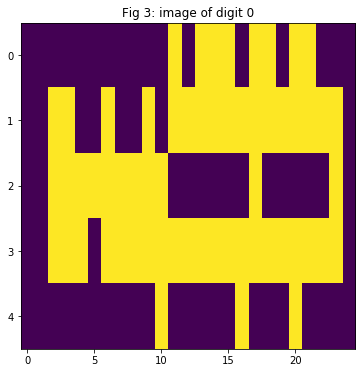

In [25]:
# visualization of image generated in previous question
image = stack([V[:,symbol-1] for symbol in observation_sequence], axis=0).T
fig_3 = figure(figsize=(6,6))
imshow(image, interpolation='none', aspect='auto');
title('Fig 3: image of digit 0');
show()

* Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc…)

In [26]:
# load matrices
A1 = loadtxt(path + '/A1.txt')
B1 = loadtxt(path + '/B1.txt')
A7 = loadtxt(path + '/A7.txt')
B7 = loadtxt(path + '/B7.txt')

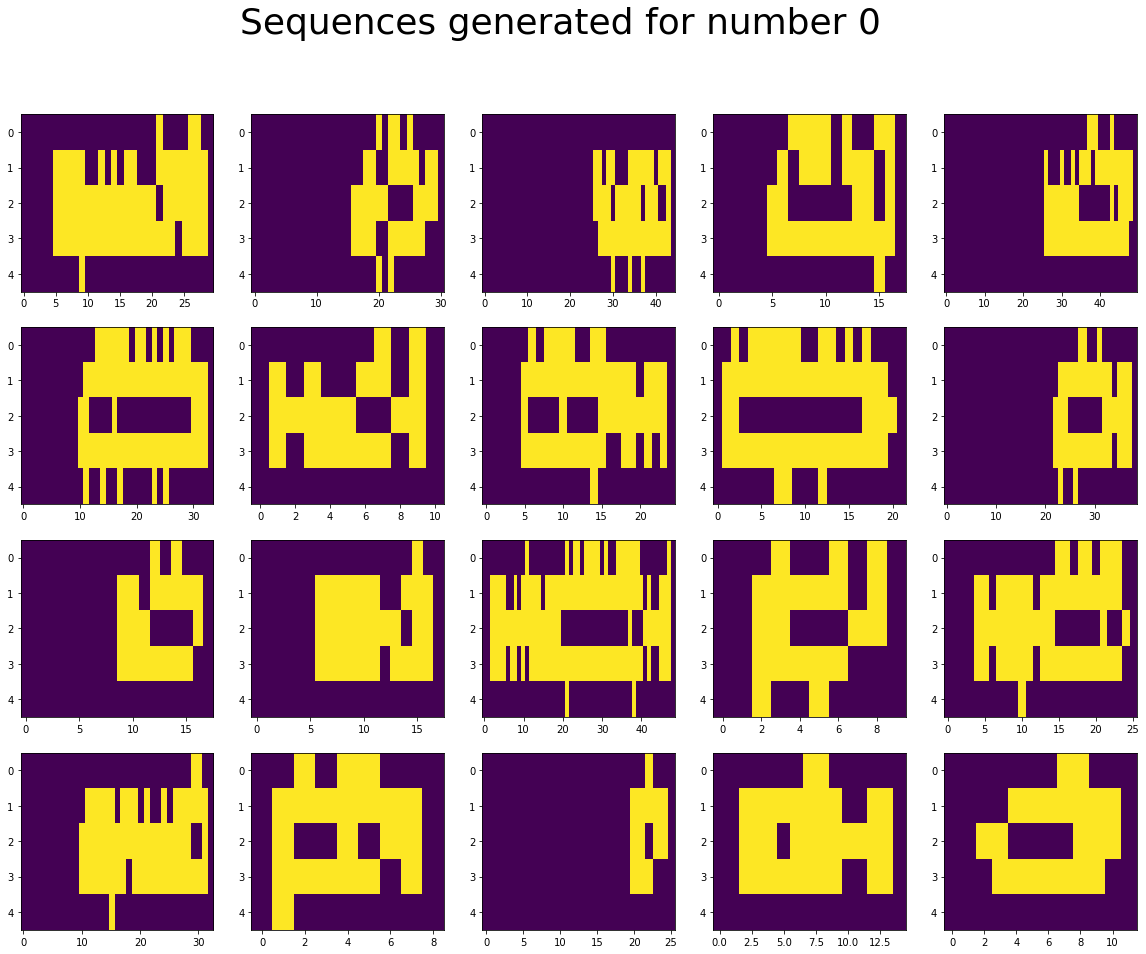

In [27]:
# display 20 examples of class 0
fig4 = figure(1, figsize=(20, 15))
suptitle("Sequences generated for number 0", fontsize=36)
for index in range(1,21):
    state_sequence, observation_sequence = genere_state_obs_seq(A0, B0)
    image = stack([V[:,symbol-1] for symbol in observation_sequence], axis=0).T
    subplot(4,5,index)
    imshow(image, interpolation='none', aspect='auto');

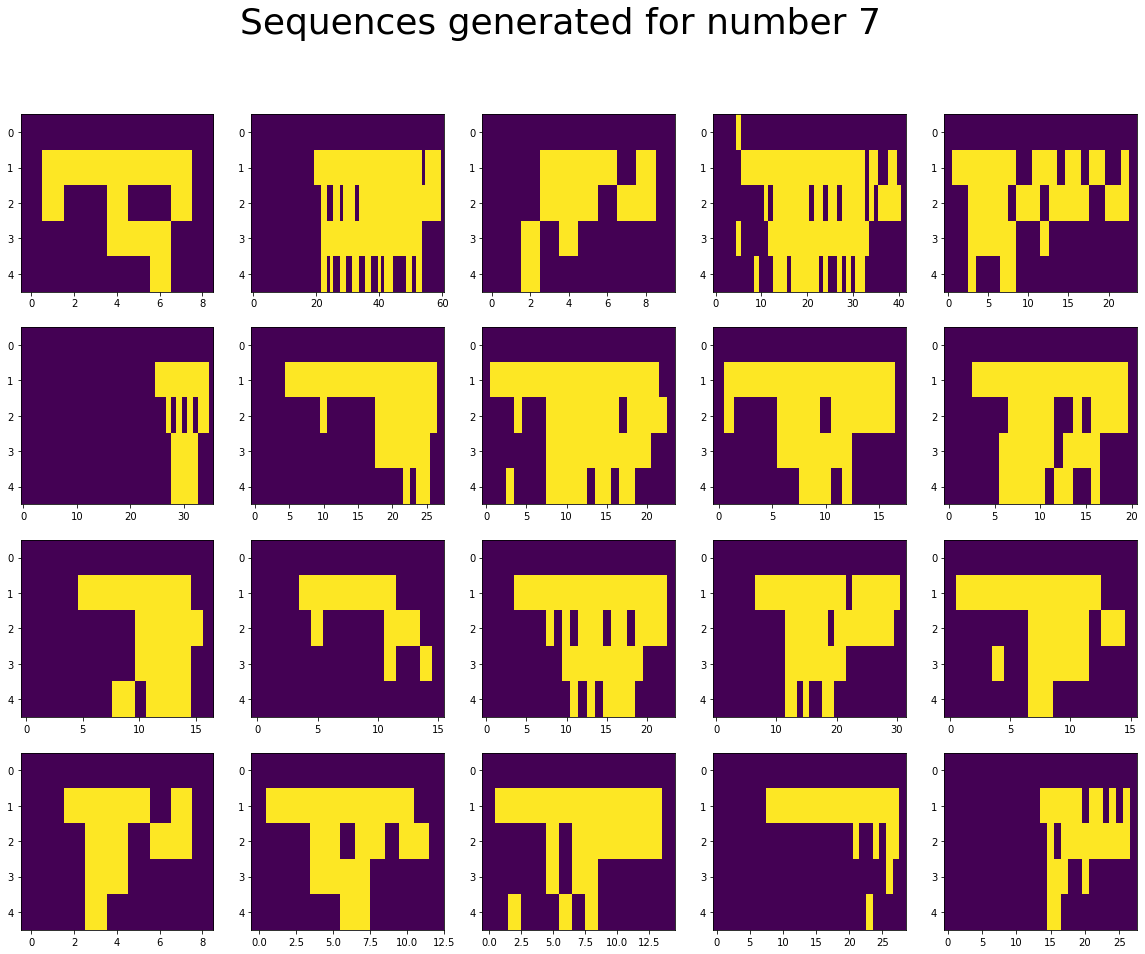

In [28]:
# display 20 examples of class 0
fig5 = figure(1, figsize=(20, 15))
suptitle("Sequences generated for number 7", fontsize=36)
for index in range(1,21):
    state_sequence, observation_sequence = genere_state_obs_seq(A7, B7)
    image = stack([V[:,symbol-1] for symbol in observation_sequence], axis=0).T
    subplot(4,5,index)
    imshow(image, interpolation='none', aspect='auto');

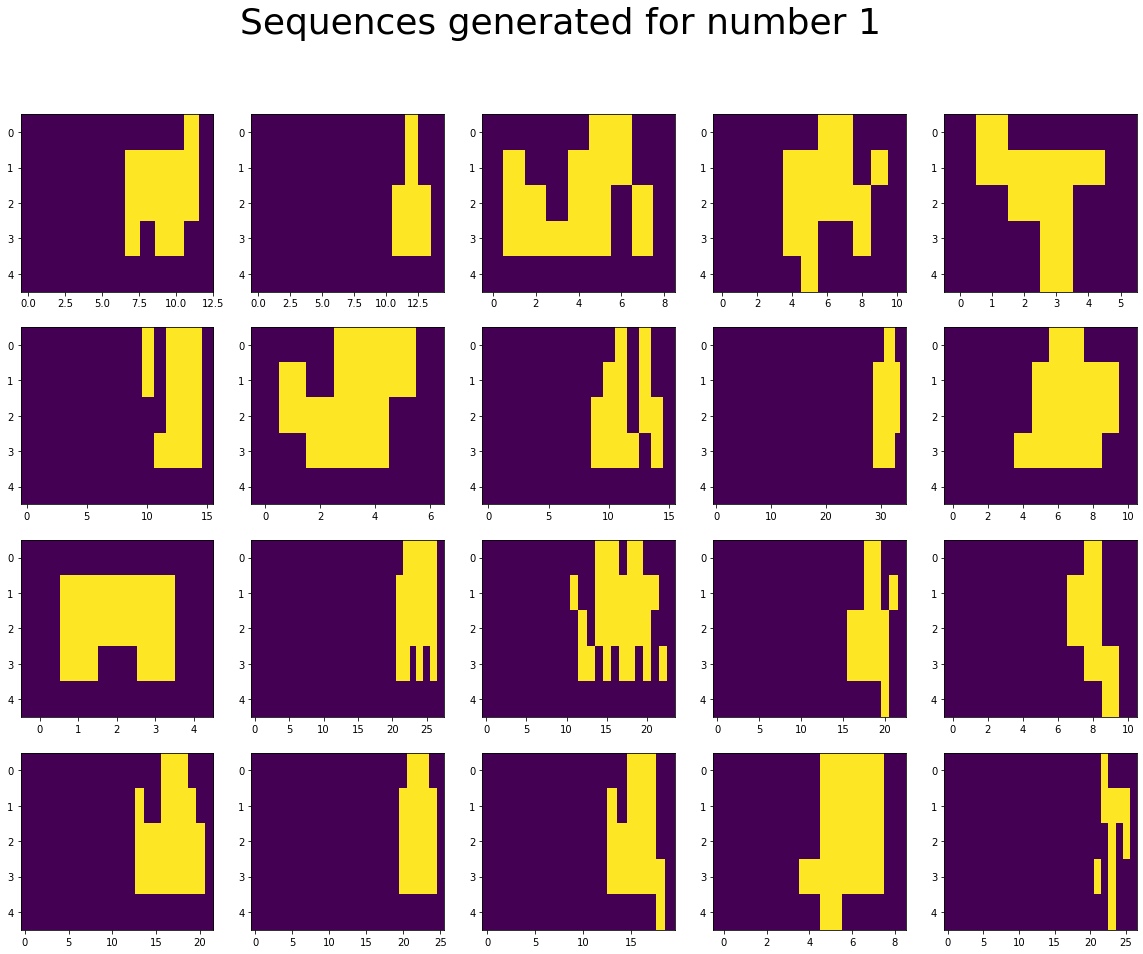

In [29]:
# display 20 examples of class 1
fig6 = figure(1, figsize=(20, 15))
suptitle("Sequences generated for number 1", fontsize=36)
for index in range(1,21):
    state_sequence, observation_sequence = genere_state_obs_seq(A1, B1)
    image = stack([V[:,symbol-1] for symbol in observation_sequence], axis=0).T
    subplot(4,5,index)
    imshow(image, interpolation='none', aspect='auto');

### II.3. Calcul de la vraisemblance de séquences d’observations

* Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences
d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne.

In [30]:
# load sequences
SeqTest0 = loadtxt(path + '/SeqTest0.txt').astype(int)
SeqTest1 = loadtxt(path + '/SeqTest1.txt').astype(int)
SeqTest7 = loadtxt(path + '/SeqTest7.txt').astype(int)

### II.3.1 Calcul des vraisemblances

* Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme). Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).

In [31]:
# auxiliary function to switch to log values
def log_matrix(X):
    log_X = X.copy()
    # for non-zero entries, simply take the log
    log_X[X != 0] = log(X[X != 0])
    # for zero entries, log is not defined; set to large negative value
    log_X[X == 0] = -500
    return log_X

# function for Viterbi algorithm
def viterbi(A, B, pi, seq):
    # get dimensions for the table
    nb_states = A.shape[0]
    seq_length = seq.shape[0]
    # initiate Delta and Phi tables
    Delta_table = zeros((nb_states, seq_length))
    Phi_table = zeros((nb_states, seq_length))
    # switch matrices to log
    log_pi = log_matrix(pi)
    log_A = log_matrix(A)
    log_B = log_matrix(B)
    # initial period
    b = log_B.T[:, seq[0]-1]
    Delta_table[:,0] = b + log_pi
    # other sequence periods
    for sequence_period in range(1, seq_length):
        obs = seq[sequence_period]
        delta = Delta_table[:,sequence_period-1]
        for state in range(nb_states):
            a = log_A[:,state]
            b = log_B.T[state, obs-1]
            temp = delta + a + b
            Phi_table[state, sequence_period] = argmax(temp) + 1
            Delta_table[state, sequence_period] = amax(temp)
    log_likelihood = amax(Delta_table[:,-1])
    likelihood = exp(log_likelihood)
    return log_likelihood, likelihood

Note: pour des raisons de lisibilité, je limite dans cette question le calcul de la vraisemblance à une seule séquence de chaque classe. La classification de l'ensemble des séquences se fera en question suivante.

In [32]:
# likelihood for one sequence of each class
loglik, lik = viterbi(A0, B0, Pi, SeqTest0[0,:])
print("La log-vraissemblance de la séquence de classe 0 avec les paramètres A0 et B0 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A1, B1, Pi, SeqTest0[0,:])
print("La log-vraissemblance de la séquence de classe 0 avec les paramètres A1 et B1 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A7, B7, Pi, SeqTest0[0,:])
print("La log-vraissemblance de la séquence de classe 0 avec les paramètres A7 et B7 est de " + str(round(loglik,2)) + ".")
print()
loglik, lik = viterbi(A0, B0, Pi, SeqTest1[0,:])
print("La log-vraissemblance de la séquence de classe 1 avec les paramètres A0 et B0 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A1, B1, Pi, SeqTest1[0,:])
print("La log-vraissemblance de la séquence de classe 1 avec les paramètres A1 et B1 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A7, B7, Pi, SeqTest1[0,:])
print("La log-vraissemblance de la séquence de classe 1 avec les paramètres A7 et B7 est de " + str(round(loglik,2)) + ".")
print()
loglik, lik = viterbi(A0, B0, Pi, SeqTest7[0,:])
print("La log-vraissemblance de la séquence de classe 7 avec les paramètres A0 et B0 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A1, B1, Pi, SeqTest7[0,:])
print("La log-vraissemblance de la séquence de classe 7 avec les paramètres A1 et B1 est de " + str(round(loglik,2)) + ".")
loglik, lik = viterbi(A7, B7, Pi, SeqTest7[0,:])
print("La log-vraissemblance de la séquence de classe 7 avec les paramètres A7 et B7 est de " + str(round(loglik,2)) + ".")

La log-vraissemblance de la séquence de classe 0 avec les paramètres A0 et B0 est de -29.21.
La log-vraissemblance de la séquence de classe 0 avec les paramètres A1 et B1 est de -93.01.
La log-vraissemblance de la séquence de classe 0 avec les paramètres A7 et B7 est de -106.19.

La log-vraissemblance de la séquence de classe 1 avec les paramètres A0 et B0 est de -70.17.
La log-vraissemblance de la séquence de classe 1 avec les paramètres A1 et B1 est de -53.33.
La log-vraissemblance de la séquence de classe 1 avec les paramètres A7 et B7 est de -72.52.

La log-vraissemblance de la séquence de classe 7 avec les paramètres A0 et B0 est de -88.23.
La log-vraissemblance de la séquence de classe 7 avec les paramètres A1 et B1 est de -81.56.
La log-vraissemblance de la séquence de classe 7 avec les paramètres A7 et B7 est de -32.56.


On observe que pour les exemples considérées, la log-vraisemblance la plus élevée est systématiquement celle qui correspond à la classe correcte. Autrement dit, les paramètres A0, A1, A7, B0, B1 et B7 dont on dispose semblent être capables de classifier correctement les exemples de séquences considérés. On considère en prochaine question la classification de l'ensemble des 30 séquences.

### II.3.2 Classification des images de test

* Donner le résultat de la classification des images de test en considérant un problème à
trois classes : 0, 1 et 7.

In [33]:
# initiate counters
count_correct = 0

# class 0
for index, sequence in enumerate(SeqTest0):
    loglik0, lik0 = viterbi(A0, B0, Pi, sequence)
    loglik1, lik1 = viterbi(A1, B1, Pi, sequence)
    loglik7, lik7 = viterbi(A7, B7, Pi, sequence)
    log_lik = [loglik0, loglik1, -1000, -1000, -1000, -1000, -1000, loglik7]
    predicted_class = argmax(log_lik)
    if predicted_class == 0:
        count_correct += 1
        print("La séquence " + str(index+1) + " de la classe 0 a été correctement prédite comme 0.")
    else:
        print("La séquence " + str(index+1) + " de la classe 0 a été incorrectement prédite comme " + str(predicted_class) + ".")
print()
        
# class 1
for index, sequence in enumerate(SeqTest1):
    loglik0, lik0 = viterbi(A0, B0, Pi, sequence)
    loglik1, lik1 = viterbi(A1, B1, Pi, sequence)
    loglik7, lik7 = viterbi(A7, B7, Pi, sequence)
    log_lik = [loglik0, loglik1, -1000, -1000, -1000, -1000, -1000, loglik7]
    predicted_class = argmax(log_lik)
    if predicted_class == 1:
        count_correct += 1
        print("La séquence " + str(index+1) + " de la classe 1 a été correctement prédite comme 1.")
    else:
        print("La séquence " + str(index+1) + " de la classe 1 a été incorrectement prédite comme " + str(predicted_class) + ".")
print()

# class 7
for index, sequence in enumerate(SeqTest7):
    loglik0, lik0 = viterbi(A0, B0, Pi, sequence)
    loglik1, lik1 = viterbi(A1, B1, Pi, sequence)
    loglik7, lik7 = viterbi(A7, B7, Pi, sequence)
    log_lik = [loglik0, loglik1, -1000, -1000, -1000, -1000, -1000, loglik7]
    predicted_class = argmax(log_lik)
    if predicted_class == 7:
        count_correct += 1
        print("La séquence " + str(index+1) + " de la classe 7 a été correctement prédite comme 7.")
    else:
        print("La séquence " + str(index+1) + " de la classe 7 a été incorrectement prédite comme " + str(predicted_class) + ".")

print()
print("Au total, les prévisions sont correctes pour " + str(count_correct) + " séquences sur 30." )   

La séquence 1 de la classe 0 a été correctement prédite comme 0.
La séquence 2 de la classe 0 a été correctement prédite comme 0.
La séquence 3 de la classe 0 a été correctement prédite comme 0.
La séquence 4 de la classe 0 a été correctement prédite comme 0.
La séquence 5 de la classe 0 a été correctement prédite comme 0.
La séquence 6 de la classe 0 a été correctement prédite comme 0.
La séquence 7 de la classe 0 a été correctement prédite comme 0.
La séquence 8 de la classe 0 a été correctement prédite comme 0.
La séquence 9 de la classe 0 a été correctement prédite comme 0.
La séquence 10 de la classe 0 a été correctement prédite comme 0.

La séquence 1 de la classe 1 a été correctement prédite comme 1.
La séquence 2 de la classe 1 a été correctement prédite comme 1.
La séquence 3 de la classe 1 a été correctement prédite comme 1.
La séquence 4 de la classe 1 a été correctement prédite comme 1.
La séquence 5 de la classe 1 a été correctement prédite comme 1.
La séquence 6 de la cla